In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# City A
density_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A_new/density.csv")
grid_attr_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A_new/grid_attr.csv")
infection_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A_new/infection.csv")
migration_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A_new/migration.csv")
transfer_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A_new/transfer.csv")
weather_A = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_A_new/weather.csv")

In [3]:
# City B
density_B = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_B_new/density.csv")
grid_attr_B = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_B_new/grid_attr.csv")
infection_B = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_B_new/infection.csv")
migration_B = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_B_new/migration.csv")
transfer_B = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_B_new/transfer.csv")
weather_B = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_B_new/weather.csv")

In [4]:
# City C
density_C = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_C_new/density.csv")
grid_attr_C = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_C_new/grid_attr.csv")
infection_C = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_C_new/infection.csv")
migration_C = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_C_new/migration.csv")
transfer_C = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_C_new/transfer.csv")
weather_C = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_C_new/weather.csv")

In [5]:
# City D
density_D = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_D_new/density.csv")
grid_attr_D = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_D_new/grid_attr.csv")
infection_D = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_D_new/infection.csv")
migration_D = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_D_new/migration.csv")
transfer_D = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_D_new/transfer.csv")
weather_D = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_D_new/weather.csv")

In [6]:
# City E
density_E = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_E_new/density.csv")
grid_attr_E = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_E_new/grid_attr.csv")
infection_E = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_E_new/infection.csv")
migration_E = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_E_new/migration.csv")
transfer_E = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_E_new/transfer.csv")
weather_E = pd.read_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/train_data/city_E_new/weather.csv")

In [79]:
density_A.head()
#len(density_A[density_A.hour ==0])

,dateTimeTrue,hour,longitude,latitude,population_flow_index
0,2020-05-06,0,145.408434,29.482458,0.2
1,2020-05-06,0,145.419205,29.474652,0.5
2,2020-05-06,0,145.420993,29.469928,0.1
3,2020-05-06,0,145.421002,29.474652,0.3
4,2020-05-06,0,145.429994,29.471445,0.1


In [71]:
grid_attr_A.tail()
#grid_attr_A.groupby('region_id').agg(['count', 'size', 'nunique'])

,grid_x,grid_y,region_id
11794,147.438632,30.305743,117
11795,147.438632,30.307302,117
11796,147.438632,30.308861,117
11797,147.438632,30.310428,117
11798,147.438632,30.311987,117


In [77]:
print(infection_A.head())
len(infection_A[(infection_A.region_id == 1)])

  city_id  region_id dateTimeTrue  number_of_newly_infected_persons
0       A          0   2020-05-02                                 0
1       A          0   2020-05-03                                 0
2       A          0   2020-05-04                                 0
3       A          0   2020-05-05                                 0
4       A          0   2020-05-06                                 0


44

In [12]:
migration_A.head()

,migrationDateTimeTrue,migration_departure_city,migration_arrival_city,migration_scale_index
0,2020-05-01,A,C,0.119750
1,2020-05-01,A,D,0.249966
2,2020-05-01,A,E,0.059551
3,2020-05-01,B,A,0.331290
4,2020-05-01,C,A,0.117547


In [15]:
transfer_A.head()

,hour,longitude_of_departure,latitude_departure,longitude_arrival,latitude_arrival,transfer_intensity
0,0,145.453431,29.461634,145.457060,29.477293,0.3
1,0,145.457060,29.477293,145.453431,29.461634,0.4
2,0,145.458856,29.467829,145.469663,29.464551,0.1
3,0,145.534152,29.432179,145.539542,29.424323,0.1
4,0,145.541348,29.416458,145.550340,29.421114,0.1


In [16]:
weather_A.head()

,dateTimeTrue,hour,temperature,humidity,wind_direction,wind_speed,wind_force,weather
0,2020-05-01,1,15,81%,East,<12km/h,1,Sunny
1,2020-05-01,2,14,99%,North,<12km/h,3,Cloudy
2,2020-05-01,3,14,99%,North,<12km/h,1,Cloudy
3,2020-05-01,4,14,96%,Quiet,NaN,0,Sunny
4,2020-05-01,5,14,100%,North,<12km/h,1,Sunny


In [17]:
print(density_A.shape)
print(grid_attr_A.shape)
print(infection_A.shape)
print(migration_A.shape)
print(transfer_A.shape)
print(weather_A.shape)

(35906204, 5)
(11799, 3)
(5309, 4)
(359, 4)
(5670547, 6)
(1079, 8)


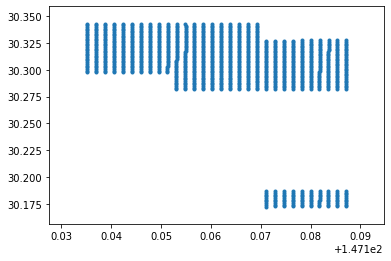

In [75]:
abc = grid_attr_A[(grid_attr_A.region_id >= 10) & (grid_attr_A.region_id <= 20)]
abc
plt.scatter(x=abc.grid_x, y=abc.grid_y, marker=".")

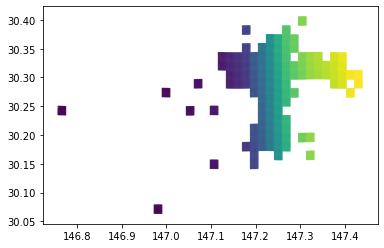

In [70]:
plt.scatter(x=grid_attr_A["grid_x"], y=grid_attr_A["grid_y"], marker=".", s=1, c=grid_attr_A["region_id"])

In [80]:
density_A[density_A.hour ==0]

,dateTimeTrue,hour,longitude,latitude,population_flow_index
0,2020-05-06,0,145.408434,29.482458,0.2
1,2020-05-06,0,145.419205,29.474652,0.5
2,2020-05-06,0,145.420993,29.469928,0.1
3,2020-05-06,0,145.421002,29.474652,0.3
4,2020-05-06,0,145.429994,29.471445,0.1
...,...,...,...,...,...
33072978,2020-06-13,0,147.731506,30.264975,0.3
33072979,2020-06-13,0,147.731506,30.266535,0.1
33072980,2020-06-13,0,147.731506,30.269654,0.3
33072981,2020-06-13,0,147.731506,30.271214,0.1


In [91]:
region_0 = grid_attr_A[grid_attr_A.region_id == 0]
grid_long = region_0['grid_x'].to_list()
print(grid_long[5])

grid_lat = region_0['grid_y'].to_list()
print(grid_lat[5])

146.757698
30.244955


     dateTimeTrue  hour   longitude   latitude  population_flow_index
5315   2020-05-06     0  146.105591  30.246250                    0.2
7100   2020-05-06     0  146.170269  30.238489                    0.1
7101   2020-05-06     0  146.170269  30.240049                    0.2
9015   2020-05-06     0  146.240274  30.240275                    0.1
9016   2020-05-06     0  146.240274  30.241835                    0.1


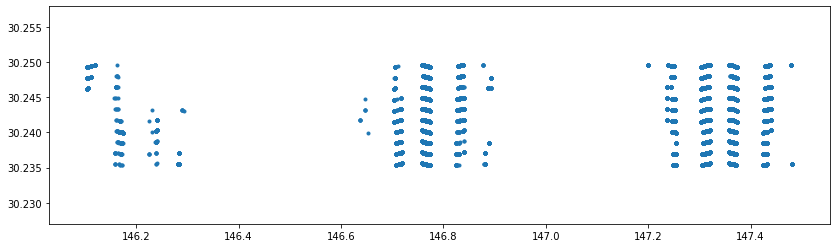

In [99]:
out = density_A[density_A['latitude'].isin(grid_lat)]
# isin() - (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)
print(out.head())
plt.scatter(x=out.longitude, y=out.latitude, marker=".")
plt.gcf().set_size_inches(14,4)

In [100]:
#out.to_csv("/Users/vineethjason/Desktop/chinaCompetitionAI/temp_lat.csv", index=False)

In [138]:
bbb = infection_A[infection_A.region_id == 1]

bbb_ts_list = bbb["number_of_newly_infected_persons"].tolist() 
# tolist - (https://stackoverflow.com/questions/23748995/pandas-dataframe-column-to-list)
bbb_ts_newlist = np.cumsum(bbb_ts_list)
# numpy.cumsum() - (https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html?highlight=cumsum#numpy.cumsum)
bbb["timeseries"] = bbb_ts_newlist
bbb = bbb.loc[:, ["dateTimeTrue","number_of_newly_infected_persons","timeseries"]]
# index,subset,slicing - (https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/)

bbb

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,dateTimeTrue,number_of_newly_infected_persons,timeseries
44,2020-05-01,0,0
45,2020-05-02,0,0
46,2020-05-03,0,0
47,2020-05-04,0,0
48,2020-05-05,0,0
49,2020-05-06,0,0
50,2020-05-07,0,0
51,2020-05-08,0,0
52,2020-05-09,0,0
53,2020-05-10,0,0


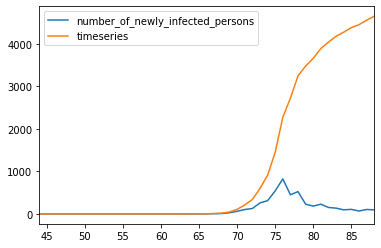

In [139]:
bbb.plot()

In [141]:
# (shorturl.at/pIX48)
X = bbb["timeseries"].values.reshape(-1,1)
y = bbb["number_of_newly_infected_persons"].values.reshape(-1,1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [143]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
# intercept:
print(regressor.intercept_)
# slope:
print(regressor.coef_)

[45.25446521]
[[0.04693309]]


In [145]:
y_pred = regressor.predict(X_test)

In [146]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,311,87.916641
1,229,227.730305
2,103,55.157346
3,0,45.254465
4,0,45.254465
5,28,47.413387
6,128,61.164781
7,0,45.254465
8,152,234.864134


In [149]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 64.11909371687395
Mean Squared Error: 7767.878601860147
Root Mean Squared Error: 88.13556944764211
